In [17]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)

In [5]:
import pickle
from config.constants import PROCESSED_DIR


pkl_path = PROCESSED_DIR / "user_df.pkl"
with open(pkl_path, 'rb') as f:
    user_df = pickle.load(f)

pkl_path = PROCESSED_DIR / "post_df.pkl"
with open(pkl_path, 'rb') as f:
    post_df = pickle.load(f)

pkl_path = PROCESSED_DIR / "feed_data.pkl"
with open(pkl_path, 'rb') as f:
    feed_df = pickle.load(f)

In [6]:
user_df.columns

Index(['user_id', 'country', 'gender', 'age', 'city', 'exp_group'], dtype='object')

In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163205 entries, 0 to 163204
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   country    163205 non-null  object
 2   gender     163205 non-null  int64 
 3   age        163205 non-null  int64 
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 7.5+ MB


In [8]:
df_memory = user_df.memory_usage(deep=True).sum()

print(f"Общий объем датафрейма: {df_memory / (1024**2):.2f} МБ")

Общий объем датафрейма: 25.23 МБ


In [9]:
df_memory = post_df.memory_usage(deep=True).sum()

print(f"Общий объем датафрейма: {df_memory / (1024**2):.2f} МБ")

Общий объем датафрейма: 10.88 МБ


In [10]:
user_df.shape, feed_df.shape, post_df.shape

((163205, 6), (892330, 5), (7023, 24))

In [11]:
df = feed_df.merge(post_df, on='post_id')

In [12]:
df = df.merge(user_df, on='user_id')

In [13]:
df.describe()

,user_id,post_id,target,views,view_reach,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,...,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster,gender,age,exp_group
count,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,...,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000,892330.000000
mean,87970.656180,3400.026692,0.120659,12721.749873,11998.059036,28119.835601,28119.835601,16871.901361,6.229921,0.367638,...,0.348650,0.372582,0.373964,0.319258,0.332462,0.376099,0.298928,0.563440,26.898165,2.042657
std,49532.601942,2095.368878,0.325731,6139.055883,5537.003674,11164.607357,11164.607357,6698.764414,4.552649,0.143911,...,0.097203,0.115502,0.081241,0.086940,0.087754,0.077865,0.085117,0.495959,10.114594,1.415468
min,1254.000000,1.000000,0.000000,6423.000000,6289.000000,13330.000000,13330.000000,7998.000000,0.000000,0.064096,...,0.099570,0.075485,0.083195,0.061403,0.078034,0.105433,0.073753,0.000000,14.000000,0.000000
25%,41706.000000,1528.000000,0.000000,6769.000000,6617.000000,17813.000000,17813.000000,10687.800000,2.000000,0.271738,...,0.272956,0.285935,0.319062,0.261190,0.266496,0.324168,0.243602,0.000000,19.000000,1.000000
50%,92896.000000,3201.000000,0.000000,8730.000000,8436.000000,20520.000000,20520.000000,12312.000000,6.000000,0.389348,...,0.353286,0.361623,0.372595,0.323242,0.327379,0.372779,0.290883,1.000000,24.000000,2.000000
75%,128532.000000,5212.000000,0.000000,17076.000000,16023.000000,38512.000000,38512.000000,23107.200000,11.000000,0.470776,...,0.420986,0.467878,0.431158,0.375600,0.398982,0.428652,0.346860,1.000000,33.000000,3.000000
max,161988.000000,7319.000000,1.000000,22673.000000,20892.000000,49882.000000,49882.000000,29929.200000,14.000000,0.744705,...,0.676321,0.735459,0.674196,0.662667,0.655015,0.677274,0.656471,1.000000,71.000000,4.000000


In [14]:
df['request_hour'] = df.timestamp.dt.hour
df['request_day_of_week'] = df.timestamp.dt.weekday
df['request_month'] = df.timestamp.dt.month
df['request_week'] = df.timestamp.dt.isocalendar().week.astype('int')
    
df['is_weekend'] = (df['request_day_of_week'] >= 5).astype(int)

In [18]:
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df['time_of_day'] = pd.cut(df['request_hour'], bins=bins, labels=labels, include_lowest=True, right=False).fillna('night')

In [19]:
df['time_of_day'].value_counts()

afternoon    310499
morning      297235
evening      284595
night             1
Name: time_of_day, dtype: int64

In [24]:
pkl_path = PROCESSED_DIR / "training_set.pkl"
with open(pkl_path, 'wb') as f:
    pickle.dump(df, f)

In [20]:
pkl_path = PROCESSED_DIR / "training_set.pkl"
with open(pkl_path, 'rb') as f:
    df = pickle.load(f)

In [21]:
df = df.drop([
#    'timestamp',
    'action',
    'text'],
    axis=1)

df = df.set_index(['user_id', 'post_id'])

In [22]:
df.timestamp.max(), df.timestamp.min()

(Timestamp('2021-12-29 23:43:15'), Timestamp('2021-10-01 06:01:52'))

In [23]:
X = df.drop(['target'], axis=1)
y = df['target']

In [24]:
train_mask = df['timestamp'] < df['timestamp'].quantile(q=5/6)
X_train, y_train = df.drop(['timestamp', 'target'], axis=1)[train_mask], df['target'][train_mask]
X_test, y_test = df.drop(['timestamp', 'target'], axis=1)[~train_mask], df['target'][~train_mask]

In [25]:
X_test.shape[0]/X_train.shape[0]

0.20000053791782768

In [26]:
X_train.columns

Index(['topic', 'views', 'view_reach', 'TotalTfIdf', 'MaxTfIdf', 'MeanTfIdf',
       'TextCluster', 'DistanceTo1thCluster', 'DistanceTo2thCluster',
       'DistanceTo3thCluster', 'DistanceTo4thCluster', 'DistanceTo5thCluster',
       'DistanceTo6thCluster', 'DistanceTo7thCluster', 'DistanceTo8thCluster',
       'DistanceTo9thCluster', 'DistanceTo10thCluster',
       'DistanceTo11thCluster', 'DistanceTo12thCluster',
       'DistanceTo13thCluster', 'DistanceTo14thCluster',
       'DistanceTo15thCluster', 'country', 'gender', 'age', 'city',
       'exp_group', 'request_hour', 'request_day_of_week', 'request_month',
       'request_week', 'is_weekend', 'time_of_day'],
      dtype='object')

In [27]:
cat_features = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'time_of_day', 
    'is_weekend', 'request_week', 'request_month',
    'request_day_of_week', 'request_hour','time_of_day'
]

In [28]:
from catboost import CatBoostClassifier

In [29]:
catboost = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2,
                              random_state=42,
                              use_best_model=True)

catboost.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.3510407	test: 0.4028844	best: 0.4028844 (0)	total: 154ms	remaining: 15.3s
1:	learn: 0.3429834	test: 0.3945559	best: 0.3945559 (1)	total: 229ms	remaining: 11.2s
2:	learn: 0.3416806	test: 0.3933415	best: 0.3933415 (2)	total: 317ms	remaining: 10.2s
3:	learn: 0.3404015	test: 0.3927388	best: 0.3927388 (3)	total: 390ms	remaining: 9.35s
4:	learn: 0.3399303	test: 0.3919541	best: 0.3919541 (4)	total: 462ms	remaining: 8.77s
5:	learn: 0.3396156	test: 0.3916530	best: 0.3916530 (5)	total: 533ms	remaining: 8.35s
6:	learn: 0.3394764	test: 0.3916080	best: 0.3916080 (6)	total: 604ms	remaining: 8.03s
7:	learn: 0.3393356	test: 0.3914610	best: 0.3914610 (7)	total: 670ms	remaining: 7.71s
8:	learn: 0.3391521	test: 0.3912590	best: 0.3912590 (8)	total: 738ms	remaining: 7.46s
9:	learn: 0.3391099	test: 0.3911936	best: 0.3911936 (9)	total: 809ms	remaining: 7.28s
10:	learn: 0.3390035	test: 0.3901054	best: 0.3901054 (10)	total: 880ms	remaining: 7.12s
11:	learn: 0.3388971	test: 0.3897724	best: 0.3897724

In [ ]:
from config.constants import MODELS_DIR

model_path = MODELS_DIR / 'catboost1.cbm'
catboost.save_model(model_path)

In [32]:
model_path = MODELS_DIR / 'catboost_min_features.cbm'
catboost.save_model(model_path)

In [78]:
catboost1 = CatBoostClassifier().load_model(MODELS_DIR / 'catboost1.cbm', format='cbm')

In [79]:
catboost2 = CatBoostClassifier(iterations=1000,
                               learning_rate=0.5,
                               depth=2,
                               use_best_model=True,
                               random_state=42,
                               verbose=50)

catboost2.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.4180697	test: 0.4440234	best: 0.4440234 (0)	total: 108ms	remaining: 1m 48s
50:	learn: 0.3312226	test: 0.3820117	best: 0.3820117 (50)	total: 4.61s	remaining: 1m 25s
100:	learn: 0.3303549	test: 0.3815132	best: 0.3815111 (94)	total: 9.03s	remaining: 1m 20s
150:	learn: 0.3297044	test: 0.3812982	best: 0.3812833 (149)	total: 13.5s	remaining: 1m 15s
200:	learn: 0.3290689	test: 0.3817638	best: 0.3812219 (156)	total: 18s	remaining: 1m 11s
250:	learn: 0.3287128	test: 0.3812957	best: 0.3812219 (156)	total: 22.6s	remaining: 1m 7s
300:	learn: 0.3283927	test: 0.3814556	best: 0.3811158 (287)	total: 27.3s	remaining: 1m 3s
350:	learn: 0.3281891	test: 0.3810133	best: 0.3809289 (336)	total: 32.1s	remaining: 59.3s
400:	learn: 0.3280170	test: 0.3807898	best: 0.3807583 (391)	total: 36.7s	remaining: 54.8s
450:	learn: 0.3278896	test: 0.3808045	best: 0.3807583 (391)	total: 41.5s	remaining: 50.5s
500:	learn: 0.3277326	test: 0.3824122	best: 0.3807583 (391)	total: 46.6s	remaining: 46.4s
550:	learn: 0.

In [85]:
catboost2.save_model(MODELS_DIR /'catboost2.cbm')

In [49]:
catboost2 = CatBoostClassifier().load_model(MODELS_DIR / 'catboost2.cbm', format='cbm')

In [80]:
catboost3 = CatBoostClassifier(iterations=3000,
                               learning_rate=0.1,
                               depth=2,
                               use_best_model=True,
                               early_stopping_rounds=1000,
                               random_state=42,
                               verbose=50)

catboost3.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.6166766	test: 0.6218755	best: 0.6218755 (0)	total: 124ms	remaining: 6m 11s
50:	learn: 0.3364299	test: 0.3859738	best: 0.3859738 (50)	total: 4.42s	remaining: 4m 15s
100:	learn: 0.3328046	test: 0.3827692	best: 0.3827692 (100)	total: 8.69s	remaining: 4m 9s
150:	learn: 0.3316735	test: 0.3819920	best: 0.3819920 (150)	total: 13.1s	remaining: 4m 6s
200:	learn: 0.3309466	test: 0.3813696	best: 0.3813696 (200)	total: 17.4s	remaining: 4m 2s
250:	learn: 0.3305146	test: 0.3810913	best: 0.3810913 (250)	total: 22s	remaining: 4m
300:	learn: 0.3303269	test: 0.3809506	best: 0.3809504 (297)	total: 26.5s	remaining: 3m 57s
350:	learn: 0.3301401	test: 0.3808214	best: 0.3808214 (350)	total: 31.4s	remaining: 3m 56s
400:	learn: 0.3299622	test: 0.3807074	best: 0.3806838 (399)	total: 36.1s	remaining: 3m 54s
450:	learn: 0.3298070	test: 0.3806345	best: 0.3806334 (449)	total: 40.8s	remaining: 3m 50s
500:	learn: 0.3296423	test: 0.3806658	best: 0.3806177 (466)	total: 45.6s	remaining: 3m 47s
550:	learn: 0.

In [86]:
catboost3.save_model(MODELS_DIR / 'catboost3.cbm')

In [53]:
catboost3 = CatBoostClassifier().load_model(MODELS_DIR /'catboost3.cbm', format='cbm')

In [54]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7086611953656996
Качество на тесте: 0.6841682344523433


In [55]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, catboost1.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost1.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7086611953656996
Качество на тесте: 0.6841682344523433


In [81]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost2.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost2.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7260594610412741
Качество на тесте: 0.6902697534100021


In [82]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost3.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost3.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7255741559072955
Качество на тесте: 0.6916202509013649


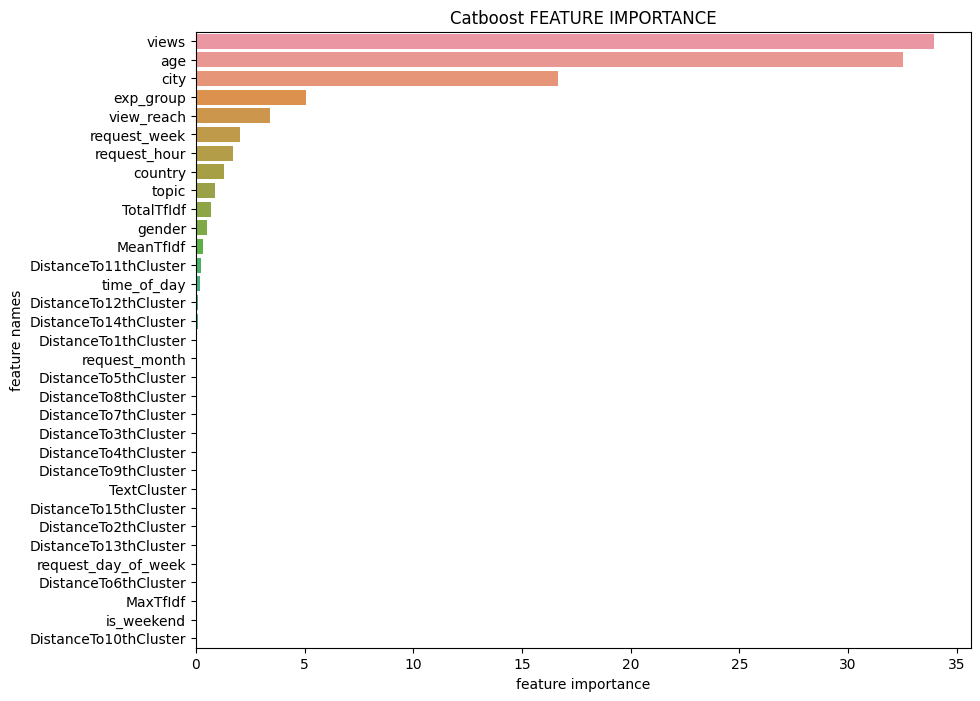

In [84]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns, 'Catboost ')

In [74]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': catboost.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance

,feature,importance
1,views,33.958348
24,age,32.551530
25,city,16.682063
26,exp_group,5.060543
2,view_reach,3.417077
30,request_week,2.014128
27,request_hour,1.705024
22,country,1.277294
0,topic,0.883816
3,TotalTfIdf,0.676597


In [62]:
feature_importance['importance_%'] = 100 * feature_importance['importance'] / feature_importance['importance'].sum()
feature_importance

,feature,importance,importance_%
1,views,33.958348,33.958348
24,age,32.551530,32.551530
25,city,16.682063,16.682063
26,exp_group,5.060543,5.060543
2,view_reach,3.417077,3.417077
30,request_week,2.014128,2.014128
27,request_hour,1.705024,1.705024
22,country,1.277294,1.277294
0,topic,0.883816,0.883816
3,TotalTfIdf,0.676597,0.676597


In [ ]:
X_train_important_features_only = X_train.drop(['DistanceTo15thCluster', 'DistanceTo2thCluster', 'DistanceTo13thCluster', 'request_day_of_week', 'DistanceTo6thCluster', 'MaxTfIdf', 'is_weekend', 'DistanceTo10thCluster'
                                                ], axis=1)

X_test_important_features_only = X_test.drop(['DistanceTo15thCluster', 'DistanceTo2thCluster', 'DistanceTo13thCluster', 'request_day_of_week', 'DistanceTo6thCluster', 'MaxTfIdf', 'is_weekend', 'DistanceTo10thCluster'
                                                ], axis=1)

In [70]:
cat_features_new = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'time_of_day', 
    'request_week', 'request_month',
    'request_hour','time_of_day'
]


In [71]:
catboost_important_features_only = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2,
                              random_state=42,
                              use_best_model=True)

catboost_important_features_only.fit(X_train_important_features_only, y_train, cat_features_new, eval_set=(X_test_important_features_only, y_test))

0:	learn: 0.3582586	test: 0.4103030	best: 0.4103030 (0)	total: 87.8ms	remaining: 8.7s
1:	learn: 0.3534649	test: 0.4056593	best: 0.4056593 (1)	total: 181ms	remaining: 8.86s
2:	learn: 0.3494295	test: 0.4023935	best: 0.4023935 (2)	total: 251ms	remaining: 8.11s
3:	learn: 0.3479083	test: 0.4009469	best: 0.4009469 (3)	total: 336ms	remaining: 8.07s
4:	learn: 0.3471016	test: 0.3997066	best: 0.3997066 (4)	total: 403ms	remaining: 7.66s
5:	learn: 0.3365875	test: 0.3894246	best: 0.3894246 (5)	total: 468ms	remaining: 7.33s
6:	learn: 0.3364572	test: 0.3892394	best: 0.3892394 (6)	total: 535ms	remaining: 7.11s
7:	learn: 0.3363229	test: 0.3890620	best: 0.3890620 (7)	total: 614ms	remaining: 7.06s
8:	learn: 0.3361988	test: 0.3885773	best: 0.3885773 (8)	total: 683ms	remaining: 6.91s
9:	learn: 0.3360710	test: 0.3877529	best: 0.3877529 (9)	total: 759ms	remaining: 6.83s
10:	learn: 0.3357247	test: 0.3874143	best: 0.3874143 (10)	total: 828ms	remaining: 6.7s
11:	learn: 0.3348935	test: 0.3863784	best: 0.3863784 

In [73]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, catboost_important_features_only.predict_proba(X_train_important_features_only)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost_important_features_only.predict_proba(X_test_important_features_only)[:, 1])}")

Качество на трейне: 0.7049366457321791
Качество на тесте: 0.6805112032208234
